# Problem

The problem is to predict the rating of a movie based on features like gender, age, etc.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Preprocessing

In [2]:
movies_data = pd.read_csv('movies.dat', sep='::',engine='python',names=['MovieID','Title','Genres'])
movies_data.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [3]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [4]:
users_data = pd.read_csv('users.dat', sep='::',engine='python',names=['UserID','Gender','Age','Occupation','Zip-code'])
users_data.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [5]:
# Occupation is chosen from the following choices:

# 0: "other" or not specified
# 1: "academic/educator"
# 2: "artist"
# 3: "clerical/admin"
# 4: "college/grad student"
# 5: "customer service"
# 6: "doctor/health care"
# 7: "executive/managerial"
# 8: "farmer"
# 9: "homemaker"
# 10: "K-12 student"
# 11: "lawyer"
# 12: "programmer"
# 13: "retired"
# 14: "sales/marketing"
# 15: "scientist"
# 16: "self-employed"
# 17: "technician/engineer"
# 18: "tradesman/craftsman"
# 19: "unemployed"
# 20: "writer"

In [6]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [7]:
ratings_data = pd.read_csv('ratings.dat', sep='::',engine='python',names=['UserID','MovieID','Rating','Timestamp'])
ratings_data.head(100)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
95,2,2490,3,978299966
96,2,1834,4,978298813
97,2,3471,5,978298814
98,2,589,4,978299773


In [8]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [9]:
final_data = ratings_data.merge(movies_data, on='MovieID').merge(users_data, on='UserID')
final_data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Title       1000209 non-null  object
 5   Genres      1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [11]:
final_data['Age'].value_counts()

Age
25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: count, dtype: int64

# Data visualization 

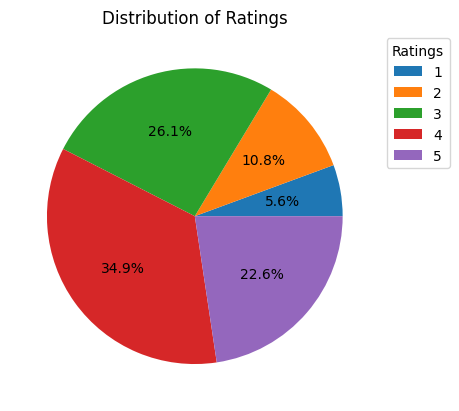

In [13]:
rating = final_data["Rating"].value_counts()
numbers = rating.sort_index()
quantity = numbers.values
plt.pie(quantity,autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.legend(title="Ratings",labels=numbers.index, bbox_to_anchor=(1,1))
plt.show()

# visualized that most movies are rated 4/5 by users.

In [14]:
# top 10 movies with viewer rating 5/5.
top_movies = final_data.loc[final_data['Rating'] == 5]
top_movies['Title'].value_counts().head(10)

Title
American Beauty (1999)                                   1963
Star Wars: Episode IV - A New Hope (1977)                1826
Raiders of the Lost Ark (1981)                           1500
Star Wars: Episode V - The Empire Strikes Back (1980)    1483
Schindler's List (1993)                                  1475
Godfather, The (1972)                                    1475
Shawshank Redemption, The (1994)                         1457
Matrix, The (1999)                                       1430
Saving Private Ryan (1998)                               1405
Sixth Sense, The (1999)                                  1385
Name: count, dtype: int64

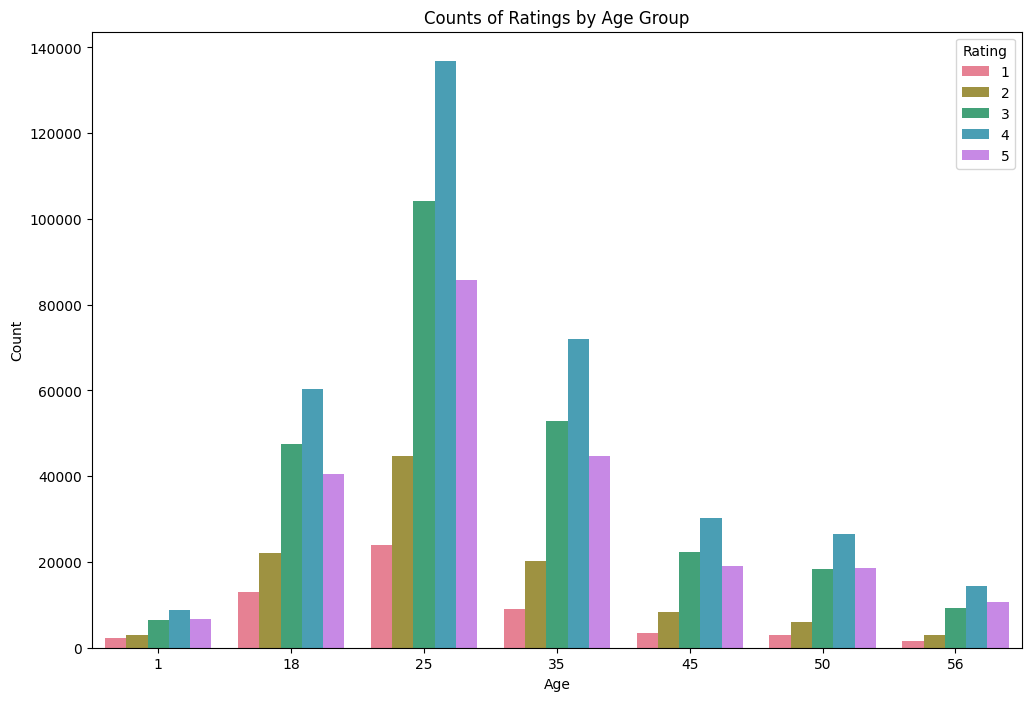

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(data=final_data, x='Age', hue='Rating', palette='husl')

plt.title('Counts of Ratings by Age Group')
plt.ylabel('Count')
plt.show()

In [16]:
# visualizing rating of movie 'Sixth Sense' based on few features
selected_movie = final_data[final_data['Title'].str.contains("Sixth Sense")]
selected_movie

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
38,1,2762,4,978302091,"Sixth Sense, The (1999)",Thriller,F,1,10,48067
210,15,2762,4,978196817,"Sixth Sense, The (1999)",Thriller,M,25,7,22903
414,17,2762,5,978159467,"Sixth Sense, The (1999)",Thriller,M,50,1,95350
937,19,2762,5,979427947,"Sixth Sense, The (1999)",Thriller,M,1,10,48073
1322,28,2762,4,978125811,"Sixth Sense, The (1999)",Thriller,F,25,1,14607
...,...,...,...,...,...,...,...,...,...,...
986180,5863,2762,5,957666185,"Sixth Sense, The (1999)",Thriller,F,25,14,89511
986201,5877,2762,5,957551857,"Sixth Sense, The (1999)",Thriller,M,18,12,02138
986223,5883,2762,4,957535521,"Sixth Sense, The (1999)",Thriller,F,18,0,02138
986249,5923,2762,5,957296008,"Sixth Sense, The (1999)",Thriller,M,25,7,05401


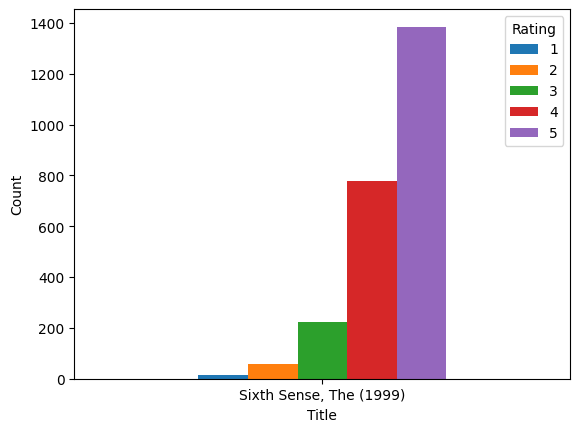

In [17]:
selected_movie.groupby(['Title','Rating']).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

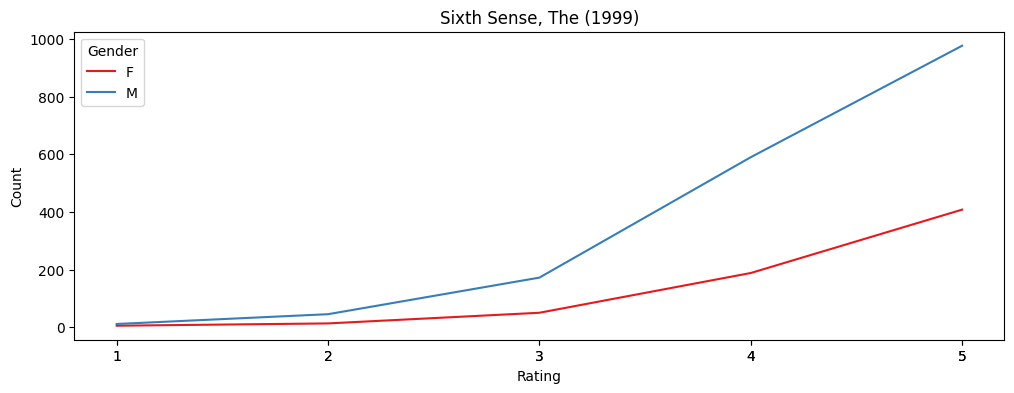

In [18]:
# Distribution of Ratings by Gender
plt.figure(figsize=(12, 4))
grouped_data = selected_movie.groupby(['Gender', 'Rating']).size().reset_index(name='Count')
sns.lineplot(data=grouped_data, x='Rating', y='Count', hue='Gender', palette='Set1')
plt.title('Sixth Sense, The (1999)')
plt.xticks(grouped_data['Rating'].astype(int))
plt.show()

In [19]:
# user-based aggregated statistics
user_stats = final_data.groupby('UserID')['Rating'].agg(['mean', 'count', 'std']).add_prefix('User_').reset_index()

# movie-based aggregated statistics
movie_stats = final_data.groupby('MovieID')['Rating'].agg(['mean', 'count', 'std']).add_prefix('Movie_').reset_index()

final_data = pd.merge(final_data, user_stats, on='UserID', how='left')
final_data = pd.merge(final_data, movie_stats, on='MovieID', how='left')
final_data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,User_mean,User_count,User_std,Movie_mean,Movie_count,Movie_std
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,4.188679,53,0.680967,4.390725,1725,0.789524
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,4.188679,53,0.680967,3.464762,525,1.023202
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,4.188679,53,0.680967,4.154088,636,0.873854
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,4.188679,53,0.680967,3.863878,1315,0.895887
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,4.188679,53,0.680967,3.854375,1703,0.879284


In [20]:
final_data.isna().sum()

UserID           0
MovieID          0
Rating           0
Timestamp        0
Title            0
Genres           0
Gender           0
Age              0
Occupation       0
Zip-code         0
User_mean        0
User_count       0
User_std         0
Movie_mean       0
Movie_count      0
Movie_std      114
dtype: int64

In [21]:
final_data.fillna(0, inplace=True)

# Separating data

In [22]:
# dropping irrelevant features
X = final_data.drop(['UserID','MovieID','Rating','Title','Genres','Zip-code'], axis=1)
Y = final_data['Rating']

In [23]:
X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'F' else 0)
X

,Timestamp,Gender,Age,Occupation,User_mean,User_count,User_std,Movie_mean,Movie_count,Movie_std
0,978300760,1,1,10,4.188679,53,0.680967,4.390725,1725,0.789524
1,978302109,1,1,10,4.188679,53,0.680967,3.464762,525,1.023202
2,978301968,1,1,10,4.188679,53,0.680967,4.154088,636,0.873854
3,978300275,1,1,10,4.188679,53,0.680967,3.863878,1315,0.895887
4,978824291,1,1,10,4.188679,53,0.680967,3.854375,1703,0.879284
...,...,...,...,...,...,...,...,...,...,...
1000204,965319075,0,45,5,2.958333,24,1.122078,3.066667,435,0.977944
1000205,965319138,0,45,5,2.958333,24,1.122078,3.258621,58,1.001058
1000206,965319197,0,45,5,2.958333,24,1.122078,2.544643,112,1.072913
1000207,965319138,0,45,5,2.958333,24,1.122078,2.539267,191,1.039877


# Data Splitting

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Data Modelling

In [25]:
# applying Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=50)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=50)

In [26]:
y_pred = model.predict(x_test)

# Testing

In [28]:
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.34184578995948345


In [33]:
score = model.score(x_train,y_train)
score

0.9080126899560544

In [34]:
accuracy = round(score * 100, 2)
accuracy

90.8